## Kmeans Test

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from ctypes import *
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

%run "~\Documents\GitHub\ProjetAnnuel3IBD\projet\python\encapsulate\encapsulateRBF.py"
%run "~\Documents\GitHub\ProjetAnnuel3IBD\projet\python\encapsulate\encapsulateSharedMethods.py"
pathDLL = "C:/Users/nico_/Documents/GitHub/ProjetAnnuel3IBD/projet/MLAlgorithms/ML_Library/x64/Release/ML_Library.dll"
myDll = CDLL(pathDLL)

- <font color=green>Simple case</font>

[[6.5 6.5]
 [2.  2. ]]


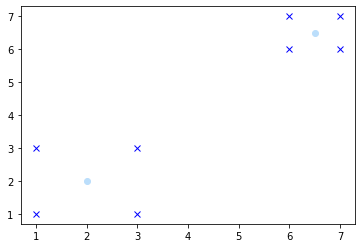

In [103]:
Xnp = np.array([ [1, 3], [3, 1], [3, 3], [1, 1], [6, 7], [7, 6], [6, 6], [7, 7]])
Ynp = np.array([ 1, 1, 1, 1, 1, 1, 1, 1])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 0)

plot_dataset(Xnp, Ynp)

# number of centroid
k = 2


myDll.kMeans.argtypes = [ c_void_p, c_int, c_int]
myDll.kMeans.restype = c_void_p
centroids = myDll.kMeans(pMatrixX, k, 50)


lenResult =  len(Xnp[0])
myDll.matrixToNumpy.argtypes = [c_void_p, c_int, c_int]
myDll.matrixToNumpy.restype = ndpointer(dtype=c_double, shape=(lenResult * k,))
res = myDll.matrixToNumpy(centroids, k, lenResult)

res = np.reshape(res ,(k, 2))
print(res)

for i in range(0, np.size(res,0)):
    plt.scatter(res[i][0], res[i][1], color='#bbdefb')


[[ -5.61629384  -0.63729734]
 [-10.37934128  -3.98126909]
 [ -7.09123913  -8.14246823]]


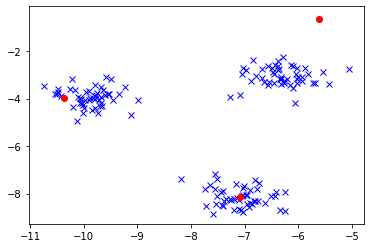

In [159]:
Xnp, ynp = make_blobs(centers=4, n_samples=200, cluster_std=0.4 ,random_state=1)
X = matrixToArray(Xnp.tolist())


# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 0)

plot_dataset(Xnp, ynp)

# number of centroid
k = 3

myDll.kMeans.argtypes = [ c_void_p, c_int, c_int]
myDll.kMeans.restype = c_void_p
centroids = myDll.kMeans(pMatrixX, k, -1)

lenResult = len(Xnp[0])
myDll.matrixToNumpy.argtypes = [c_void_p, c_int, c_int]
myDll.matrixToNumpy.restype = ndpointer(dtype=c_double, shape=(lenResult * k,))
res = myDll.matrixToNumpy(centroids, k, lenResult)

res = np.reshape(res ,(k, 2))
print(res)

for i in range(0, np.size(res,0)):
    plt.scatter(res[i][0], res[i][1], color='red',zorder=10)
